# Topic Distribution of PoInf

## Create a mapping of individuals:

In [1]:
import pandas as pd
import os

In [4]:
DATA_DIR = '../../data/data_schoolofinf'

In [7]:
lookup_poinf = pd.read_pickle(os.path.join(DATA_DIR, 'lookup_poinf.pkl'))
lookup_pub = pd.read_pickle(os.path.join(DATA_DIR, 'lookup_pub.pkl'))

In [8]:
lookup_poinf.head(3)

,last_name,first_name,personal_url,position,parent,institute,full_name,institute_class,alias
id,,,,,,,,,
23d17ab4-123f-4929-9373-763bd7587df8,alay,ozgu,http://www.research.ed.ac.uk/portal/en/persons...,visitor official visitor,school of informatics,UNKNOWN,alay ozgu,0,NaN
d089bb44-7d0b-4b3f-b556-27def993d1d1,albrecht,stefano,http://www.research.ed.ac.uk/portal/en/persons...,lecturer in artificial intelligence,school of informatics,centre for intelligent systems and their appli...,albrecht stefano,1,"albrecht, s. v.|albrecht, s."
ecd799fb-4f63-44ae-a078-b009099f2c8c,alex,beatrice,http://www.research.ed.ac.uk/portal/en/persons...,research fellow,school of informatics,institute of language cognition and computation,alex beatrice,2,"alex, b. (ed.)|alex, b.|symington, b."


In [9]:
lookup_pub.head(3)

,year,authors,shortnames,collab_id,edges
pub_id,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,d.p. o'brien|r. galvao|m. keilhacker|e. lazzar...,"brien, d. p.|galvao, r.|keilhacker, m.|lazzaro...","[328, 1970, 569, 5683, 5144, a78a09b5-138e-407...","[(328, 1970), (328, 569), (328, 5683), (328, 5..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,paolo guagliardo|piotr wieczorek,"guagliardo, p.|wieczorek, p.","[653c9723-b374-4ad3-9cef-0f7e7f45d812, 4998]","[(653c9723-b374-4ad3-9cef-0f7e7f45d812, 4998)]"
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,p. buneman|l. libkin|d. suciu|v. tannen|l. wong,"buneman, p.|libkin, l.|suciu, d.|tannen, v. |w...","[90396347-473b-4fba-8b1d-a1d25ea18b6b, a22b33f...","[(90396347-473b-4fba-8b1d-a1d25ea18b6b, a22b33..."


In [10]:
# Create a new pandas table that merge the lookup_poinf and lookup_pub
# each pub in lookup_pub have a collab_id that have a list of collaborators by id
# We can ignore those that are not in the list of id for PoInf

# Create the list of ids for easy checking:
poinf_id = set(lookup_poinf.index)

# we can now create such an index:
pub_mapping = {str(_id):set() for _id in list(poinf_id)}

for row in lookup_pub.iterrows():
    pub_id = row[0]
    collab_ids = row[1]['collab_id']
    for _id in collab_ids:
        if _id in poinf_id:
            pub_mapping[_id].add(pub_id)

In [11]:
row_list = [{'id':k, 'pub_ids':v} for (k,v) in pub_mapping.items()]

In [14]:
df_pubmapping = pd.DataFrame(row_list)

In [16]:
df_pubmapping.iloc[5:10]

,id,pub_ids
5,60ea63ba-9e12-4fc5-81c3-16ff526284f3,"{e65f7aea-e608-42c8-90a3-25fef00ac440, da19cb9..."
6,64843475-7ad9-42b8-9e9a-624b40915d65,"{60fcc305-513d-42b5-8731-32996c9318f8, 1cd062c..."
7,e76a7c40-a177-4eb5-9ac3-12ab104895f8,"{379f5ac7-d1b4-4608-8eac-435cb3a02888, 03a5a60..."
8,8fda0e73-b28f-475d-9ba3-6d812a0d9fd1,"{a9e8ecb2-6968-4700-a8c3-d105540e1006, 715c3f6..."
9,dfee7091-0d56-4b1e-a821-5f0f0b37ea02,"{fd7318c5-57c0-4604-a382-b607276c78f4, fa8e38f..."


In [18]:
df_pubmapping.to_pickle(os.path.join(DATA_DIR, 'poinf_to_pub_mapping.pkl'))
df_pubmapping.to_csv(os.path.join(DATA_DIR, 'poinf_to_pub_mapping.csv'),index=False)

## Create concat_toks for each individual

In [19]:
lookup_poinf_more = lookup_poinf.join(df_pubmapping.set_index('id'))

In [20]:
lookup_poinf_more.iloc[20:24]

,last_name,first_name,personal_url,position,parent,institute,full_name,institute_class,alias,pub_ids
id,,,,,,,,,,
bd14c9d9-1e8b-4816-b547-d3727e0d8537,belle,vaishak,http://www.research.ed.ac.uk/portal/en/persons...,chancellors fellow in humanlike computing ando...,school of informatics,centre for intelligent systems and their appli...,belle vaishak,1,"belle, v.","{2eae3572-8eda-46de-a395-d39f85c438c6, 9f24e22..."
aa593eb8-2ac7-415c-aec5-738f11b6e795,berrada,ghita,http://www.research.ed.ac.uk/portal/en/persons...,research associate,school of informatics,laboratory for foundations of computer science,berrada ghita,3,"berrada, g.","{ef99dd16-2668-499e-a544-5aa89ad050d9, 6841c65..."
0b2fae7b-cf7f-4f8b-a92c-4fa055ff9d63,bhatotia,pramod,http://www.research.ed.ac.uk/portal/en/persons...,senior lecturer in computing systems architecture,school of informatics,institute for computing systems architecture,bhatotia pramod,5,"bhatotia, p.","{bedeb6ea-a1c2-423f-ada8-4ef2eef947f1, 506d0bc..."
350d5a79-901a-4018-9e1a-87114b8dbe0b,bilen,hakan,http://www.research.ed.ac.uk/portal/en/persons...,lecturer in image and vision computing,school of informatics,institute of perception action and behaviour,bilen hakan,7,"bilen, h.","{1e66c98e-4ad7-482f-a61b-9329314491fc, 42989e2..."


In [96]:
def getToks(pub_ids):
    out = []
    try:
        if len(pub_ids):
            for pub_id in pub_ids:
                out.extend(pub_toks[pub_toks.index == pub_id].summary_toks)
            # Convert the list of lists to a single list:
            out = [tok for tokList in out for tok in tokList]
    except TypeError:
        print(pub_ids)
        
    return out

In [97]:
lookup_poinf_more['summary_toks'] = lookup_poinf_more.apply(lambda row: getToks(row.pub_ids), axis=1)

nan
nan
nan
nan


In [98]:
# Conert to BOW using bowified:
lookup_poinf_more['bow'] = lookup_poinf_more.apply(bowified, axis=1)

In [99]:
lookup_poinf_more['topic_distribution'] = lookup_poinf_more.apply(_inference, axis=1)

In [51]:
lookup_poinf_more.head(2)

,last_name,first_name,perseonal_url,position,parent,institute,full_name,institute_class,alias,pub_ids,toks,summary_toks,bow,topic_distribution
id,,,,,,,,,,,,,,
003ec9bb-18aa-4e6e-95e9-359f0968262a,gray,gavin,http://www.research.ed.ac.uk/portal/en/persons...,research assistant,school of informatics,institute for computing systems architecture,gray gavin,5,NaN,{},[],[],[],"[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0..."
010f9bf0-c04c-4cfb-ab3d-ca150de1e706,jackson,paul,http://www.research.ed.ac.uk/portal/en/persons...,senior lecturer,school of informatics,institute for computing systems architecture,jackson paul,5,"jackson, p. b.|jackson, p.","{c5754b06-fcf9-4362-aa3a-1142589b5402, 167c4b6...","[nuprl, use, circuit, design, nuprl, interact,...","[nuprl, use, circuit, design, nuprl, interact,...","[(22, 2), (27, 1), (29, 15), (39, 1), (40, 1),...","[0, 0.326083956289, 0.120584281776, 0.05047796..."


In [134]:
len(lookup_poinf_more)

296

In [101]:
lookup_poinf_more['remove_drop'] = lookup_poinf_more.apply(lambda row: len(row.bow) == 0, axis=1)

In [102]:
# Remove individuals that does not have any bow:
lookup_poinf_more_drop = lookup_poinf_more.drop(lookup_poinf_more[lookup_poinf_more.remove_drop==True].index)

In [103]:
len(lookup_poinf_more_drop)

219

In [135]:
lookup_poinf_more_drop['best_topic'] = lookup_poinf_more_drop.apply(lambda row: best_topic(row.topic_distribution), axis=1)

/Users/weiting/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [154]:
lookup_poinf_more_drop.head(2)

,last_name,first_name,perseonal_url,position,parent,institute,full_name,institute_class,alias,pub_ids,toks,summary_toks,bow,topic_distribution,remove_drop,best_topic
id,,,,,,,,,,,,,,,,
010f9bf0-c04c-4cfb-ab3d-ca150de1e706,jackson,paul,http://www.research.ed.ac.uk/portal/en/persons...,senior lecturer,school of informatics,institute for computing systems architecture,jackson paul,5,"jackson, p. b.|jackson, p.","{c5754b06-fcf9-4362-aa3a-1142589b5402, 167c4b6...","[nuprl, use, circuit, design, nuprl, interact,...","[nuprl, use, circuit, design, nuprl, interact,...","[(22, 2), (27, 1), (29, 15), (39, 1), (40, 1),...","[0, 0.326083956289, 0.120584281776, 0.05047796...",False,1
02c86de2-0fc9-4f6d-aee9-93b0f7557c84,franke,bjoern,http://www.research.ed.ac.uk/portal/en/persons...,reader,school of informatics,institute of language cognition and computation,franke bjoern,2,"franke, b.","{9a3368cc-e69d-4ecf-bad1-b43ab0ac89a8, ab3fccd...","[use, genet, program, sourcelevel, data, assig...","[use, genet, program, sourcelevel, data, assig...","[(1, 1), (3, 5), (6, 2), (10, 1), (11, 1), (13...","[0.0467349416537, 0, 0.0134058642663, 0.685572...",False,3


## Clustering

In [136]:
## Our dataset will be the topic_distribution:
data_poinf = lookup_poinf_more_drop.topic_distribution.values

In [137]:
data_poinf = list(data_poinf)

In [139]:
poinf_tsne = manifold.TSNE(n_components=2, init='pca', random_state=rng).fit_transform(data_poinf)

### Visualisation

#### `TSNE`

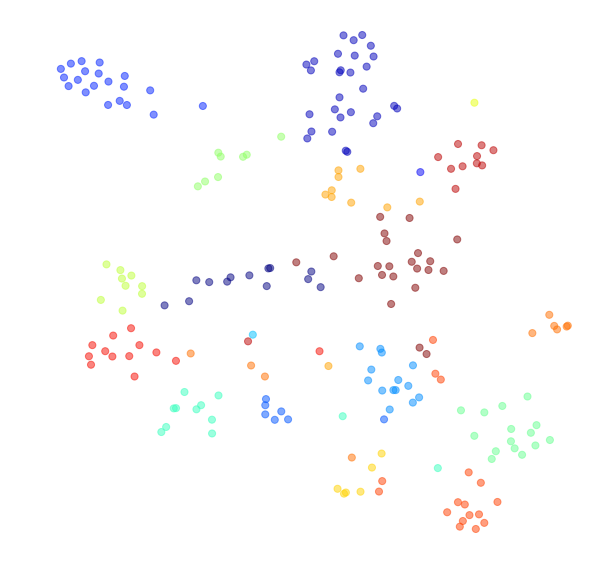

In [140]:
f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(111)
ax.scatter(
    poinf_tsne[:, 0],
    poinf_tsne[:, 1],
    c=list(lookup_poinf_more_drop.best_topic),
    cmap=plt.cm.jet,
    s=50,
    alpha=.5)
ax.legend(loc='best')
ax.axis('off')
plt.show()

In [142]:
poinf_tsne.shape

(219, 2)

#### `MDS`

In [115]:
# Multidimensional Scaling
mds_poinf = manifold.MDS(n_components=2, random_state=rng).fit_transform(data_poinf)

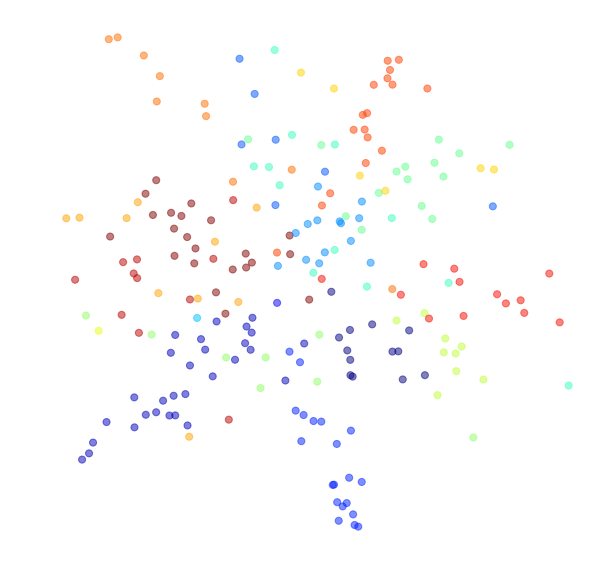

In [119]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.scatter(mds_poinf[:,0], mds_poinf[:,1], c=list(lookup_poinf_more_drop.best_topic), cmap=plt.cm.jet, s=50, alpha=.5)
ax.legend(loc='best')
ax.axis('off')
plt.show()

### K means

In [143]:
kmeansClustering = KMeans(n_clusters=20).fit_predict(data_poinf)

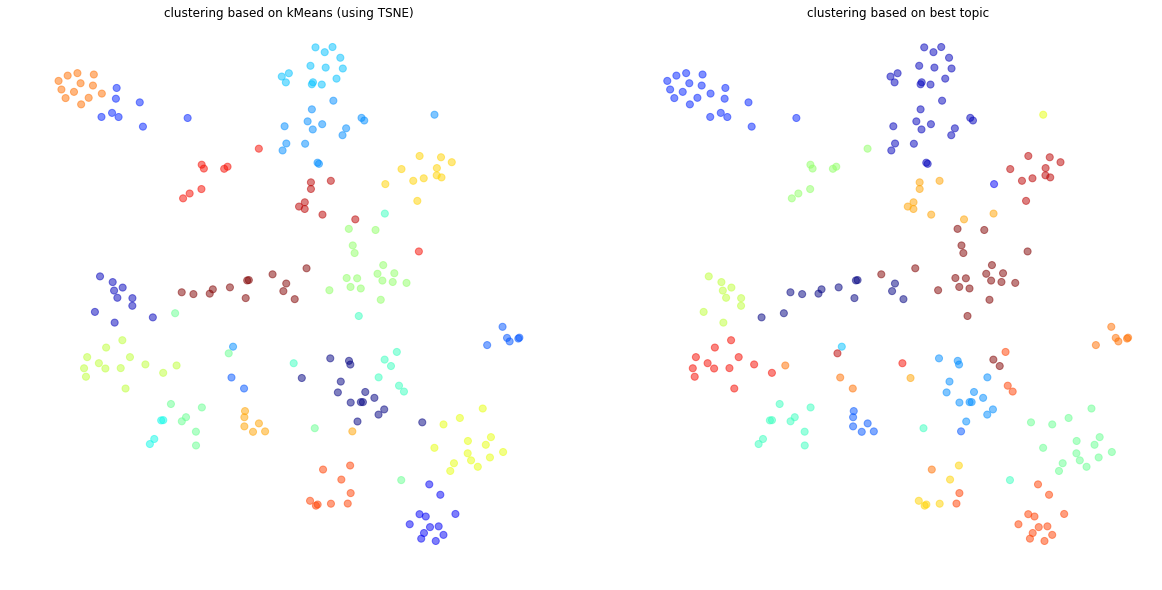

In [144]:
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
ax.scatter(
    poinf_tsne[:, 0],
    poinf_tsne[:, 1],
    c=kmeansClustering,
    cmap=plt.cm.jet,
    s=50,
    alpha=.5)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on kMeans (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(
    poinf_tsne[:, 0],
    poinf_tsne[:, 1],
    c=list(lookup_poinf_more_drop.best_topic),
    cmap=plt.cm.jet,
    s=50,
    alpha=.5)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()

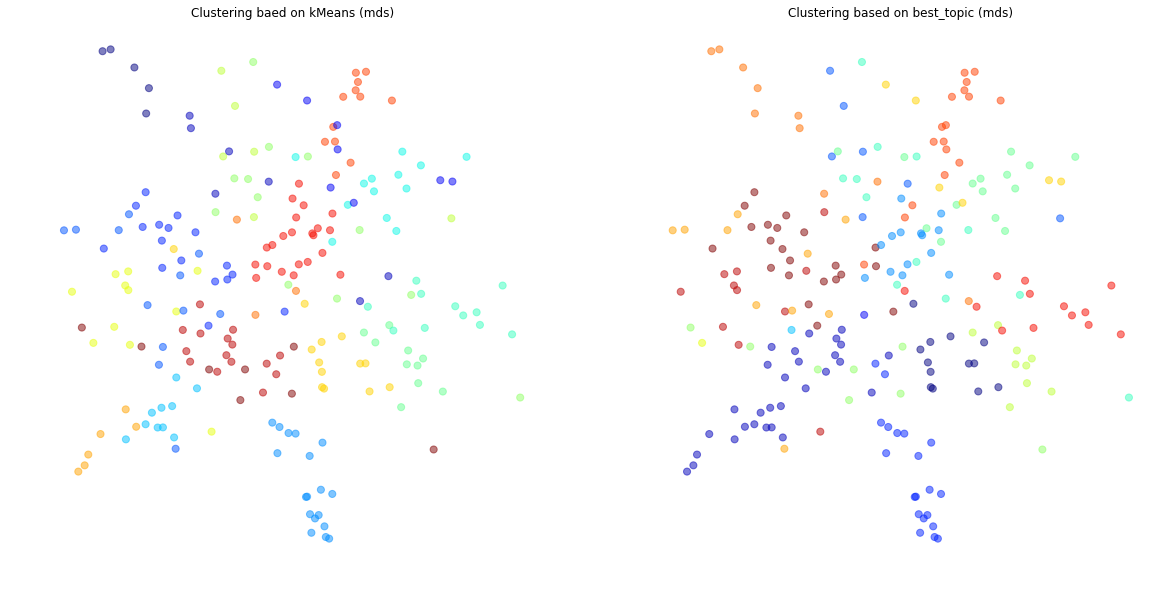

In [123]:
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
ax.scatter(
    mds_poinf[:, 0],
    mds_poinf[:, 1],
    c=kmeansClustering,
    cmap=plt.cm.jet,
    s=50,
    alpha=.5)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('Clustering baed on kMeans (mds)')

ax2 = f.add_subplot(122)
ax2.scatter(
    mds_poinf[:, 0],
    mds_poinf[:, 1],
    c=list(lookup_poinf_more_drop.best_topic),
    cmap=plt.cm.jet,
    s=50,
    alpha=.5)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('Clustering based on best_topic (mds)')
plt.show()
plt.show()

### DBScan

In [190]:
dbscan = DBSCAN(min_samples=1, algorithm='ball_tree', leaf_size=2).fit(data_poinf)

In [191]:
dbscan_clusters = dbscan.labels_
n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
print 'number of clusters:', n_clusters_

In [193]:
dbscan_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [197]:
# Try with the tsne data:
dbscan_tsne = DBSCAN().fit(x)

In [198]:
dbscan_tsne_clusters = dbscan_tsne.labels_

In [199]:
n_clusters_tsne = len(set(dbscan_tsne_clusters)) - (1 if -1 in dbscan_tsne_clusters else 0)
print 'number of clusters:', n_clusters_

number of clusters: 1



### HDBSCAN

In [124]:
hdbscan_cluster_poinf = HDBSCAN().fit(data_poinf)

number of clusters: 2


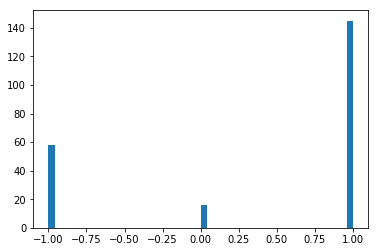

In [125]:
n_clusters_ = len(set(hdbscan_cluster_poinf.labels_)) - (1 if -1 in hdbscan_cluster_poinf.labels_ else 0)
print 'number of clusters:', n_clusters_


f = plt.figure()
ax = f.add_subplot(111)
ax.hist(hdbscan_cluster_poinf.labels_,bins=50);
plt.show()

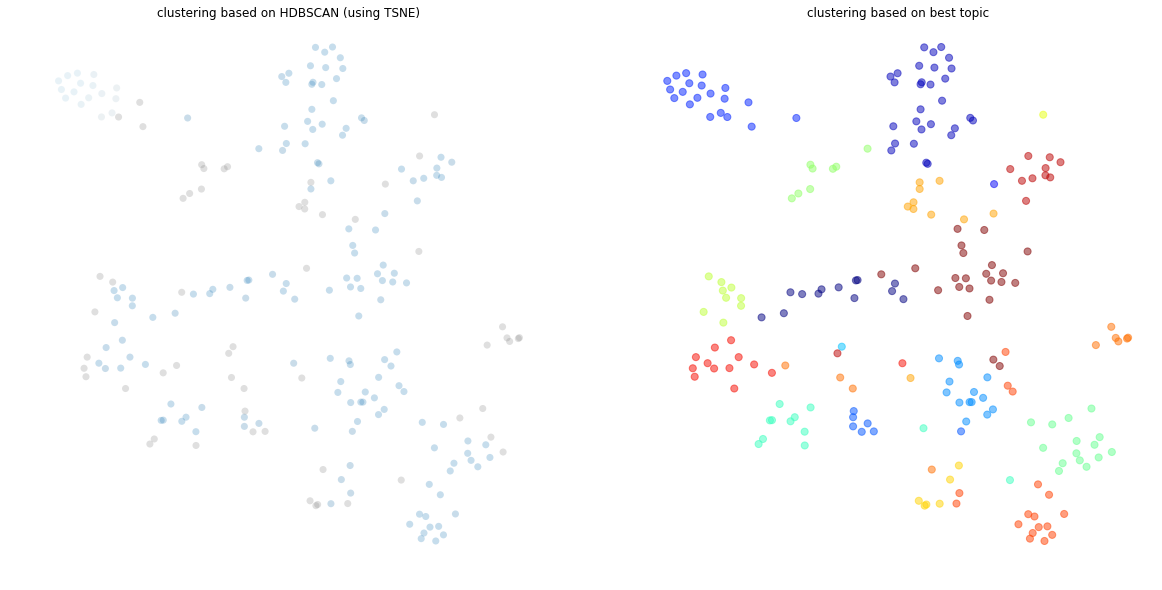

In [145]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
color_palette = sns.color_palette('husl', 103)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in hdbscan_cluster_poinf.labels_]
#  colors weighted according to te probability of being in the cluster
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, hdbscan_cluster_poinf.probabilities_)] 
ax.scatter(*poinf_tsne.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

# ax.scatter(x_components[:,0], x_components[:,1], c=hdbscan_cluster.labels_, cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on HDBSCAN (using TSNE)')

ax2 = f.add_subplot(122)
ax2.scatter(poinf_tsne[:,0], poinf_tsne[:,1], c=list(lookup_poinf_more_drop.best_topic), cmap=plt.cm.jet, s=50, alpha=.5)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')

plt.show()

###  Soft Clustering of poInf

In [173]:
cluster_poinf = HDBSCAN(prediction_data=True).fit(data_poinf)

number of clusters: 2


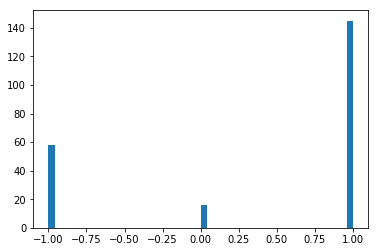

In [174]:
n_clusters_ = len(set(cluster_poinf.labels_)) - (1 if -1 in cluster_poinf.labels_ else 0)
print 'number of clusters:', n_clusters_

f = plt.figure()
ax = f.add_subplot(111)
ax.hist(cluster_poinf.labels_,bins=50);
plt.show()

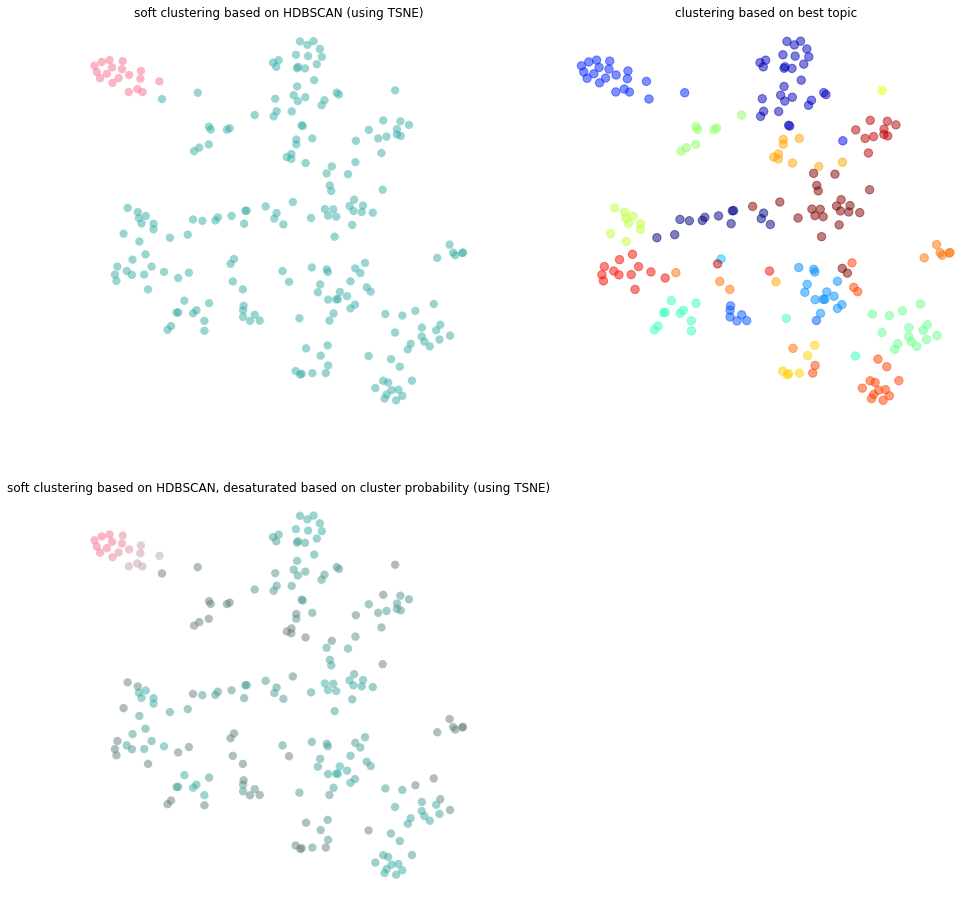

In [175]:
f = plt.figure(figsize=(16, 16))
ax = f.add_subplot(221)

soft_clusters = hdbscan.all_points_membership_vectors(cluster_poinf)
color_palette = sns.color_palette('husl', 2)
cluster_colors = [color_palette[np.argmax(x)] for x in soft_clusters]
ax.scatter(*poinf_tsne.T, s=70, linewidth=0, c=cluster_colors, alpha=0.5)
# ax.scatter(x_components[:,0], x_components[:,1], c=hdbscan_cluster.labels_, cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('soft clustering based on HDBSCAN (using TSNE)')

ax2 = f.add_subplot(222)
ax2.scatter(
    poinf_tsne[:, 0],
    poinf_tsne[:, 1],
    c=list(lookup_poinf_more_drop.best_topic),
    cmap=plt.cm.jet,
    s=70,
    alpha=.5)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')

ax3 = f.add_subplot(223)
cluster_colors = [
    sns.desaturate(color_palette[np.argmax(x)], np.max(x))
    for x in soft_clusters
]
ax3.scatter(*poinf_tsne.T, s=70, linewidth=0, c=cluster_colors, alpha=0.5)
ax3.axis('off')
ax3.set_title(
    'soft clustering based on HDBSCAN, desaturated based on cluster probability (using TSNE)'
)
plt.show()

In [176]:
soft_clusters.shape

(219, 2)

In [182]:
classDef = np.argmax(soft_clusters,axis=1)

In [190]:
lookup_poinf_more_drop.iloc[classDef==1]

,last_name,first_name,perseonal_url,position,parent,institute,full_name,institute_class,alias,pub_ids,summary_toks,bow,topic_distribution,remove_drop,best_topic
id,,,,,,,,,,,,,,,
010f9bf0-c04c-4cfb-ab3d-ca150de1e706,jackson,paul,http://www.research.ed.ac.uk/portal/en/persons...,senior lecturer,school of informatics,institute for computing systems architecture,jackson paul,5,"jackson, p. b.|jackson, p.","{c5754b06-fcf9-4362-aa3a-1142589b5402, 167c4b6...","[nuprl, use, circuit, design, nuprl, interact,...","[(22, 2), (27, 1), (29, 15), (39, 1), (40, 1),...","[0, 0.326083956289, 0.120584281776, 0.05047796...",False,1
0346dc9e-e2a7-4523-8504-a74ef42a533b,pullinger,martin,http://www.research.ed.ac.uk/portal/en/persons...,senior researcher,school of informatics,laboratory for foundations of computer science,pullinger martin,3,"pullinger, m.","{bdd3bcc2-1420-43ea-8c66-c2f3218f4dcb, 2428dec...","[work, time, reduct, polici, sustain, economi,...","[(14, 2), (22, 2), (24, 5), (38, 1), (45, 1), ...","[0.368909432042, 0, 0.0119890660601, 0.0122734...",False,0
03916cbc-3a54-4de4-be54-09c23f44dbb5,kalorkoti,k,http://www.research.ed.ac.uk/portal/en/persons...,senior lecturer,school of informatics,laboratory for foundations of computer science,kalorkoti k,3,"kalorkoti, k.|kalorkoti, k. a.","{1d11e0dd-919d-41da-8209-6d3e68c8e5fb, 1ad283d...","[invert, polynomi, formal, power, seri, proble...","[(4, 3), (6, 4), (44, 13), (58, 1), (80, 2), (...","[0, 0.463266002725, 0.0259881837671, 0.0259327...",False,1
0505dfc1-9fe5-4f4a-bab3-4af14ee69db3,goryanin,igor,http://www.research.ed.ac.uk/portal/en/persons...,chair of systems biology,school of informatics,neuroinformatics dtc,goryanin igor,6,"goryanin, i.|goryanin, i. i.","{5b8afa54-7f4b-4e68-9ab9-50899baf81f4, 8838f81...","[semiautom, genom, annot, comparison, integr, ...","[(3, 8), (11, 2), (14, 1), (16, 1), (23, 2), (...","[0.39367571095, 0.013973154296, 0.015279689953...",False,0
053590d0-39d7-4a42-b42d-61ee8d743d3e,goddard,nigel,http://www.research.ed.ac.uk/portal/en/persons...,reader,school of informatics,institute of language cognition and computation,goddard nigel,2,"goddard, n.|goddard, n. h.","{10c5a591-daea-4476-9cfe-f5729d1867d5, 2969d33...","[increment, modelbas, discrimin, articul, move...","[(2, 1), (11, 1), (14, 3), (16, 6), (22, 1), (...","[0.14540591874, 0, 0, 0.0753922225709, 0.03718...",False,19
05ed47ac-4c5e-4f9a-b7b2-45828eaad326,wallden,petros,http://www.research.ed.ac.uk/portal/en/persons...,research associate,school of informatics,UNKNOWN,wallden petros,0,"wallden, p.","{41422804-5cc2-4b53-bb8b-244b25e59867, b87ec5b...","[robust, devic, independ, verifi, blind, quant...","[(6, 1), (11, 6), (14, 28), (17, 2), (22, 1), ...","[0, 0.423894446708, 0.0374311210368, 0.0178002...",False,1
06760916-edca-488e-93da-baff6204a453,marina,mahesh,http://www.research.ed.ac.uk/portal/en/persons...,reader,school of informatics,neuroinformatics dtc,marina mahesh,6,"marina, m.|marina, m. k.","{6307436e-528c-4313-a673-67d01edd2558, d9f7969...","[virtual, dynam, backbon, mobil, ad, hoc, netw...","[(0, 1), (3, 4), (11, 4), (14, 2), (15, 1), (1...","[0.393498691038, 0, 0.024713294842, 0.09819444...",False,0
087adc6d-e04b-4168-8824-2fa69f6b39e7,vaniea,kami,http://www.research.ed.ac.uk/portal/en/persons...,lecturer in cyber security and privacy,school of informatics,laboratory for foundations of computer science,vaniea kami,3,"vaniea, k. e.|vaniea, k.","{b32513b0-8461-49f6-8542-463e9c2b4e67, 8f66327...","[loop, autom, softwar, updat, caus, unintend, ...","[(3, 1), (11, 1), (14, 1), (16, 1), (17, 1), (...","[0.0663397136443, 0, 0.0494119595467, 0, 0, 0....",False,5
09607fb1-44fb-4edc-a0ae-c54d3047be30,court,robert,http://www.research.ed.ac.uk/portal/en/persons...,research associate,school of informatics,institute for adaptive and neural computation,court robert,4,"court, r.|court, r. c.","{a771634e-3e03-4803-b5e8-722cf2e05b76, 7b82c40...","[virtual, fli, brain, use, owl, support, map, ...","[(49, 1), (79

In [191]:
lookup_poinf_more_drop.iloc[classDef==0]

,last_name,first_name,perseonal_url,position,parent,institute,full_name,institute_class,alias,pub_ids,summary_toks,bow,topic_distribution,remove_drop,best_topic
id,,,,,,,,,,,,,,,
02c86de2-0fc9-4f6d-aee9-93b0f7557c84,franke,bjoern,http://www.research.ed.ac.uk/portal/en/persons...,reader,school of informatics,institute of language cognition and computation,franke bjoern,2,"franke, b.","{9a3368cc-e69d-4ecf-bad1-b43ab0ac89a8, ab3fccd...","[use, genet, program, sourcelevel, data, assig...","[(1, 1), (3, 5), (6, 2), (10, 1), (11, 1), (13...","[0.0467349416537, 0, 0.0134058642663, 0.685572...",False,3
0b2fae7b-cf7f-4f8b-a92c-4fa055ff9d63,bhatotia,pramod,http://www.research.ed.ac.uk/portal/en/persons...,senior lecturer in computing systems architecture,school of informatics,institute for computing systems architecture,bhatotia pramod,5,"bhatotia, p.","{ea82758c-a623-40b4-9a11-1147103f2949, bedeb6e...","[increment, mapreduc, comput, larg, scale, big...","[(23, 1), (28, 1), (34, 1), (45, 4), (48, 1), ...","[0.0244220477869, 0, 0, 0.398082836141, 0, 0, ...",False,3
0d940898-e2a7-4262-bf06-5b146fb79ba2,spink,tom,http://www.research.ed.ac.uk/portal/en/persons...,research associate,school of informatics,institute of language cognition and computation,spink tom,2,"spink, t.","{ab3fccd9-365d-4757-8d2c-f62aaeb59791, e6a0f61...","[hardwar, acceler, crossarchitectur, fullsyste...","[(13, 3), (15, 2), (45, 1), (58, 1), (65, 3), ...","[0.0507503450478, 0, 0, 0.631969091882, 0, 0, ...",False,3
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931,steuwer,michel,http://www.research.ed.ac.uk/portal/en/persons...,unknown,institute for computing systems architecture,laboratory for foundations of computer science,steuwer michel,3,"steuwer, m.","{20cb2fdd-6d93-40b9-9cab-e9d818eb166e, b74a3be...","[highlevel, program, medic, imag, multigpu, sy...","[(5, 31), (6, 1), (11, 1), (15, 2), (28, 9), (...","[0.0121417985093, 0, 0.0332301562306, 0.620844...",False,3
12b8d4c5-226d-430f-8c55-554aa75fcda8,joshi,arpit,http://www.research.ed.ac.uk/portal/en/persons...,research associate,school of informatics,laboratory for foundations of computer science,joshi arpit,3,"joshi, a.","{aece86e1-ac7e-4bd9-8065-0e6386906749, fdc2a8d...","[function, transcript, factor, target, discove...","[(14, 1), (45, 2), (55, 3), (58, 2), (65, 1), ...","[0.11343552675, 0, 0, 0.43129692923, 0.0342080...",False,3
2026e8cc-5cb9-4397-b9a9-490ed120e2a5,grot,boris,http://www.research.ed.ac.uk/portal/en/persons...,lecturer in informatics,school of informatics,institute of language cognition and computation,grot boris,2,"grot, b.","{90a9d1e9-1fdc-47dd-8dc0-89dfca0a1828, e4706f7...","[scaleout, processor, scale, datacent, mandat,...","[(14, 1), (15, 3), (17, 1), (25, 3), (32, 2), ...","[0.0844472337689, 0, 0, 0.563768078615, 0.0217...",False,3
3d2352c5-8e16-4434-8802-67d74d0a4b36,viglas,stratis,http://www.research.ed.ac.uk/portal/en/persons...,personal chair of data management on new hardware,school of informatics,laboratory for foundations of computer science,viglas stratis,3,"viglas, s. d.|viglas, s.","{b047bfa3-0bb7-4686-82d1-08161610ab3f, 21a6def...","[model, multithread, queri, execut, chip, mult...","[(5, 2), (11, 2), (14, 4), (22, 1), (23, 1), (...","[0.0258041796291, 0, 0.0348903432504, 0.340716...",False,3
412b9b6c-a9d5-47d6-81af-018323057f36,bodin,bruno,http://www.research.ed.ac.uk/portal/en/persons...,research associate,school of informatics,institute for computing systems architecture,bodin bruno,5,"bodin, b.","{6b26c412-60a4-49de-b0de-56228e87e068, e45d745...","[live, evalu, cyclostat, dataflow, graph, cycl...","[(15, 1), (24, 2), (28, 4), (29, 1), (40, 1), ...","[0.0738652190376, 0.0912953966609, 0, 0.401687...",False,3
489d4278-a0a6-4e8b-857a-4ee0e800766f,wagstaff,harry,http://www.research.ed.ac.uk/portal/en/persons...,research associate,school of informatics,institute of language cognition and computation,wagstaff harry,2,"wagstaff, h.","{ab3fccd9-365d-4757-8d2c-f62aaeb59791, 1f8be5b...","[hardwar,